# 3Q Do the Eda on this Dataset :Presidential Election Polls 2024 Dataset and extract useful information from this:
Dataset: Nationwide Russian election poll data from March 04, 2024

Dataset Description:
This dataset comprises the results of a nationwide presidential election poll conducted on March 4, 2024. The
data offers various insights but does not align with the official election results. You are encouraged to create
your notebooks and delve into the data for further exploration.

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("election2024.csv")

In [4]:
df.head()

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,07169ed8148ce047,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,NaN,farming,1.445172
1,0716a4f3354cecdd,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,0716889b304ce79c,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,07168e28b5cce563,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,NaN,NaN,1.538628
4,0716a563914ce549,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1600 non-null   object 
 1   sex                  1600 non-null   object 
 2   age                  1600 non-null   float64
 3   federal_district     1600 non-null   object 
 4   type_of_city         1600 non-null   object 
 5   knows_election_date  1600 non-null   object 
 6   will_vote            1600 non-null   object 
 7   candidate            1600 non-null   object 
 8   television_usage     1600 non-null   object 
 9   internet_usage       1600 non-null   object 
 10  education            1600 non-null   object 
 11  income               1600 non-null   object 
 12  employment           1600 non-null   object 
 13  job_type             692 non-null    object 
 14  company_type         879 non-null    object 
 15  weight1              1600 non-null   f

In [6]:
# Get summary statistics of numerical columns
df.describe()

,age,weight1
count,1600.000000,1600.000000
mean,49.936250,1.000000
std,16.901797,0.327084
min,18.000000,0.468226
25%,37.000000,0.772224
50%,49.000000,0.921724
75%,64.000000,1.158913
max,90.000000,2.515072


In [7]:
df.isna().sum()

id                       0
sex                      0
age                      0
federal_district         0
type_of_city             0
knows_election_date      0
will_vote                0
candidate                0
television_usage         0
internet_usage           0
education                0
income                   0
employment               0
job_type               908
company_type           721
weight1                  0
dtype: int64

In [8]:
# Display unique values for categorical columns
df.select_dtypes(include=['object']).nunique()

id                     1600
sex                       2
federal_district          8
type_of_city              7
knows_election_date       4
will_vote                 6
candidate                 7
television_usage          6
internet_usage            6
education                 6
income                    6
employment               11
job_type                  6
company_type             21
dtype: int64

In [9]:
# Display the number of rows and columns
df.shape

(1600, 16)

In [10]:
# Drop duplicate rows if any
df.drop_duplicates(inplace=True)

In [11]:
# Handle missing values in 'job_type' and 'company_type'
# Here, we'll fill missing values with 'Unknown' for simplicity
df['job_type'].fillna('Unknown',inplace=True)
df['company_type'].fillna('Unknown',inplace=True)

In [12]:
# Display the cleaned data information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1600 non-null   object 
 1   sex                  1600 non-null   object 
 2   age                  1600 non-null   float64
 3   federal_district     1600 non-null   object 
 4   type_of_city         1600 non-null   object 
 5   knows_election_date  1600 non-null   object 
 6   will_vote            1600 non-null   object 
 7   candidate            1600 non-null   object 
 8   television_usage     1600 non-null   object 
 9   internet_usage       1600 non-null   object 
 10  education            1600 non-null   object 
 11  income               1600 non-null   object 
 12  employment           1600 non-null   object 
 13  job_type             1600 non-null   object 
 14  company_type         1600 non-null   object 
 15  weight1              1600 non-null   f

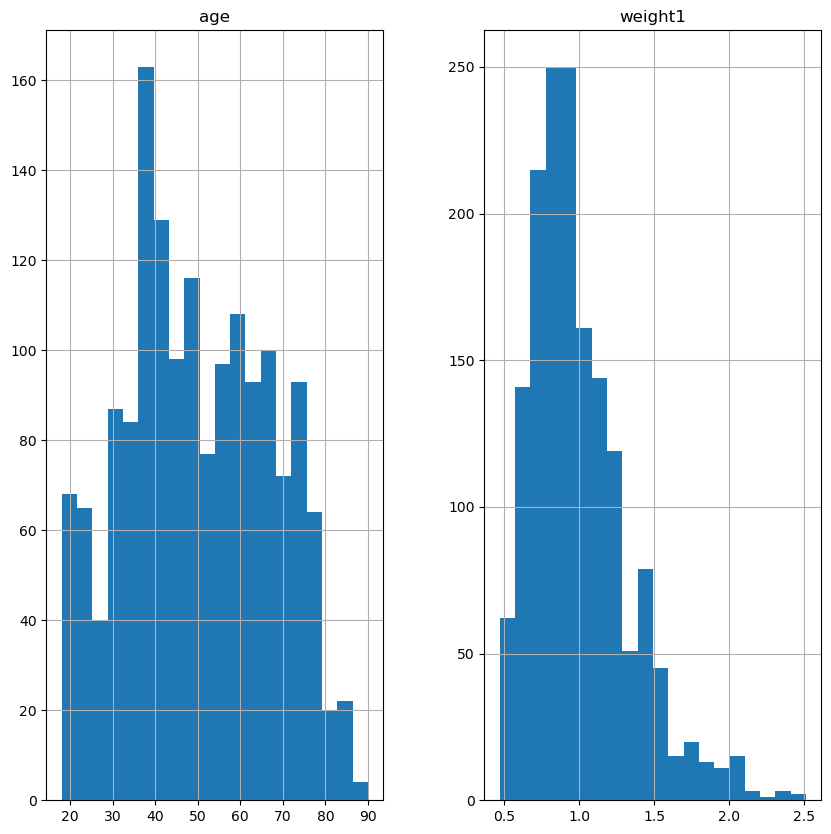

In [13]:
# Histogram for numerical columns
df.hist(figsize=(10, 10), bins=20)
plt.show()

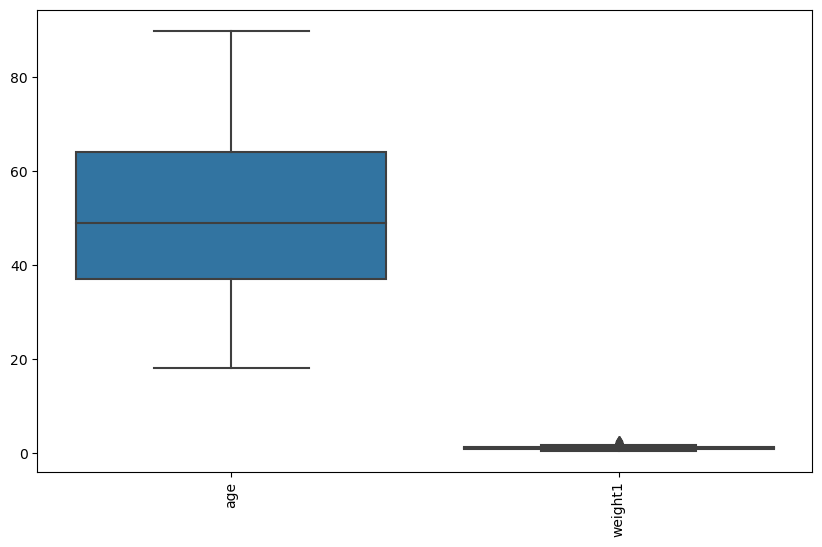

In [14]:
# Boxplot for numerical columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()


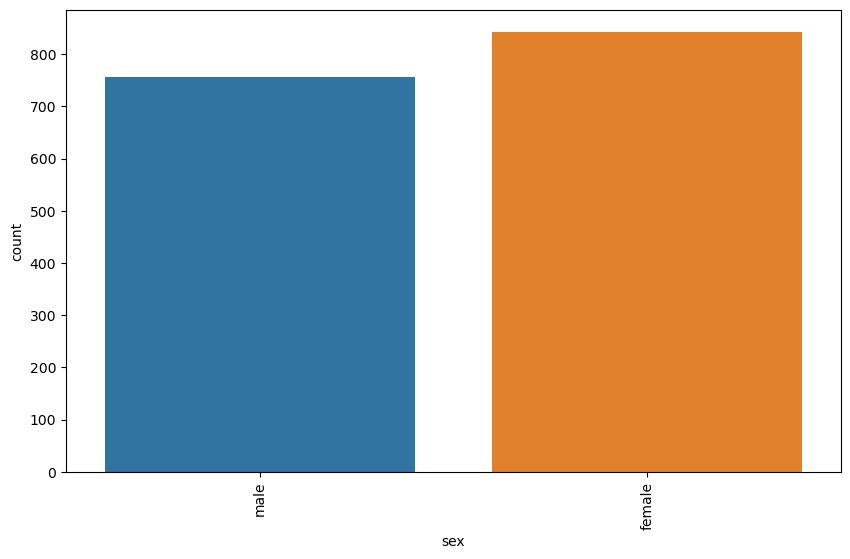

In [15]:
# Bar plot for categorical columns
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', data=df)
plt.xticks(rotation=90)
plt.show()

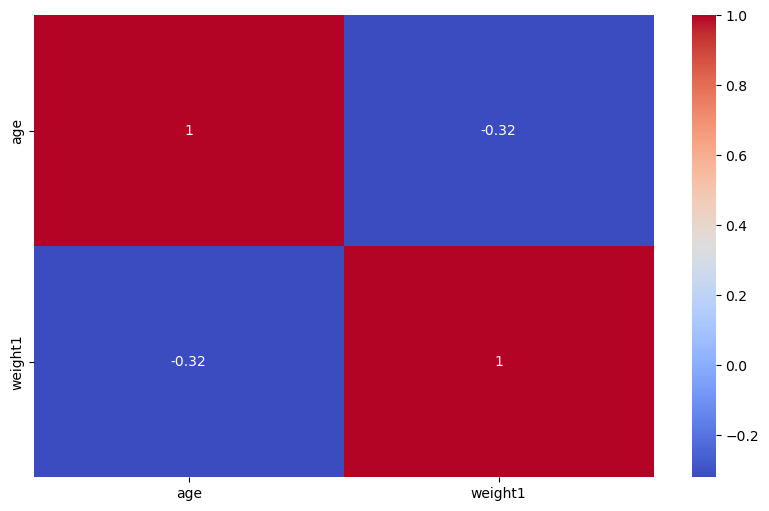

In [16]:
# Correlation heatmap for numerical columns
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [17]:
# Mean and Median Age
print(df['age'].mean())
print(df['age'].median())

# Age Distribution
df['age'].value_counts().sort_index()


49.93625
49.0


18.0    20
19.0    17
20.0    16
21.0    15
22.0    18
        ..
84.0     7
85.0     4
86.0     4
87.0     3
90.0     1
Name: age, Length: 71, dtype: int64

In [18]:
# Mean and Median Weight
print(df['weight1'].mean())
print(df['weight1'].median())

# Weight Distribution
df['weight1'].value_counts().sort_index()


1.0000000000000029
0.92172360632897


0.468226    7
0.484147    2
0.486131    1
0.498950    3
0.504748    1
           ..
2.174385    1
2.304516    1
2.314985    1
2.317664    2
2.515072    2
Name: weight1, Length: 569, dtype: int64

In [19]:
# Gender Distribution
df['sex'].value_counts()


female    843
male      757
Name: sex, dtype: int64

In [20]:
# Federal District Distribution
df['federal_district'].value_counts()


central            425
volga              324
siberian           188
southern           182
northwestern       151
ural               134
north caucasian    107
far eastern         89
Name: federal_district, dtype: int64

In [21]:
# Voting Intention Distribution
df['will_vote'].value_counts()


definitely yes        1062
likely yes             218
not sure               166
definitely no           86
likely no               55
struggle to answer      13
Name: will_vote, dtype: int64

In [22]:
# Voting Intention Distribution
df['will_vote'].value_counts()


definitely yes        1062
likely yes             218
not sure               166
definitely no           86
likely no               55
struggle to answer      13
Name: will_vote, dtype: int64

In [23]:
# Candidate Preference Distribution
df['candidate'].value_counts()


Putin                 1128
struggle to answer     164
will not take part      96
Davankov                67
Kharitonov              63
Slutskiy                55
spoilt vote             27
Name: candidate, dtype: int64

In [24]:
# Education Level Distribution
df['education'].value_counts()


college                        690
bachelor degree                550
school                         181
academic degree                 95
incomplete school education     80
no school education              4
Name: education, dtype: int64

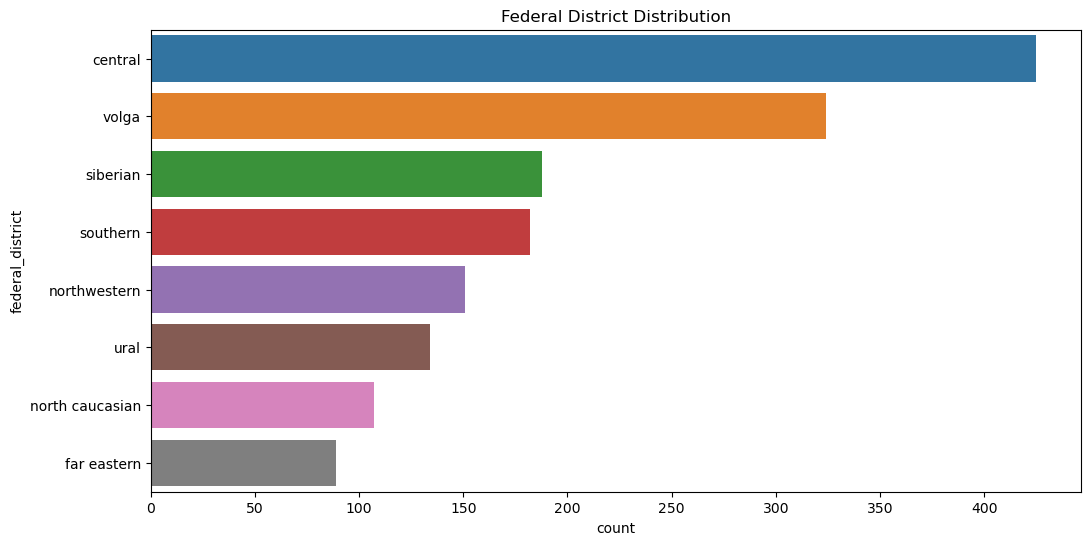

In [25]:
#Federal District Distribution
plt.figure(figsize=(12, 6))
sns.countplot(y='federal_district', data=df, order=df['federal_district'].value_counts().index)
plt.title('Federal District Distribution')
plt.show()


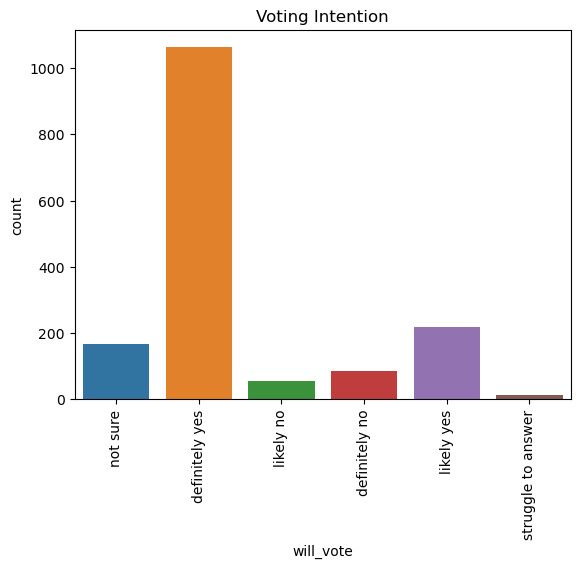

In [26]:
#Voting Intention
sns.countplot(x='will_vote', data=df)
plt.xticks(rotation=90)
plt.title('Voting Intention')
plt.show()


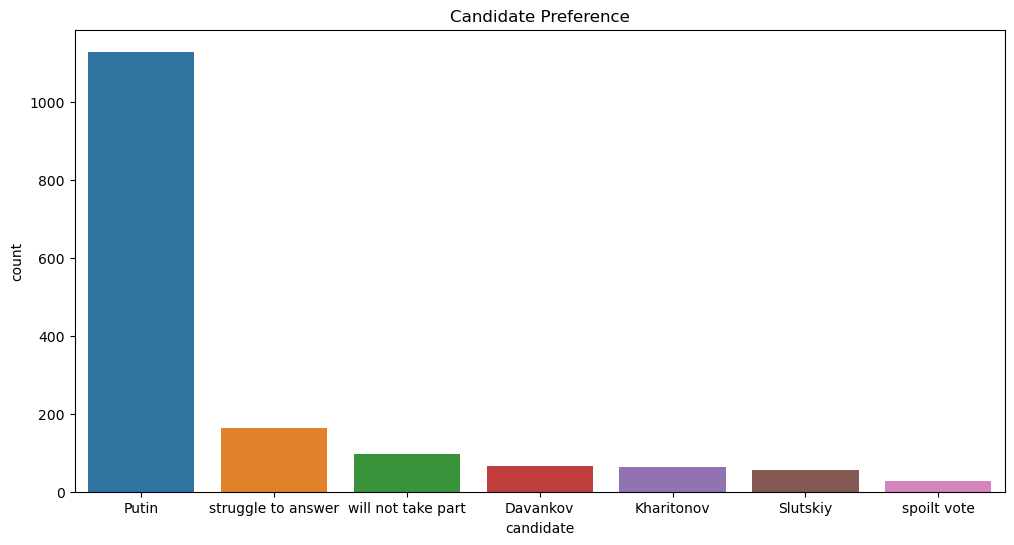

In [27]:
#Candidate Preference
plt.figure(figsize=(12, 6))
sns.countplot(x='candidate', data=df, order=df['candidate'].value_counts().index)
plt.title('Candidate Preference')
plt.show()


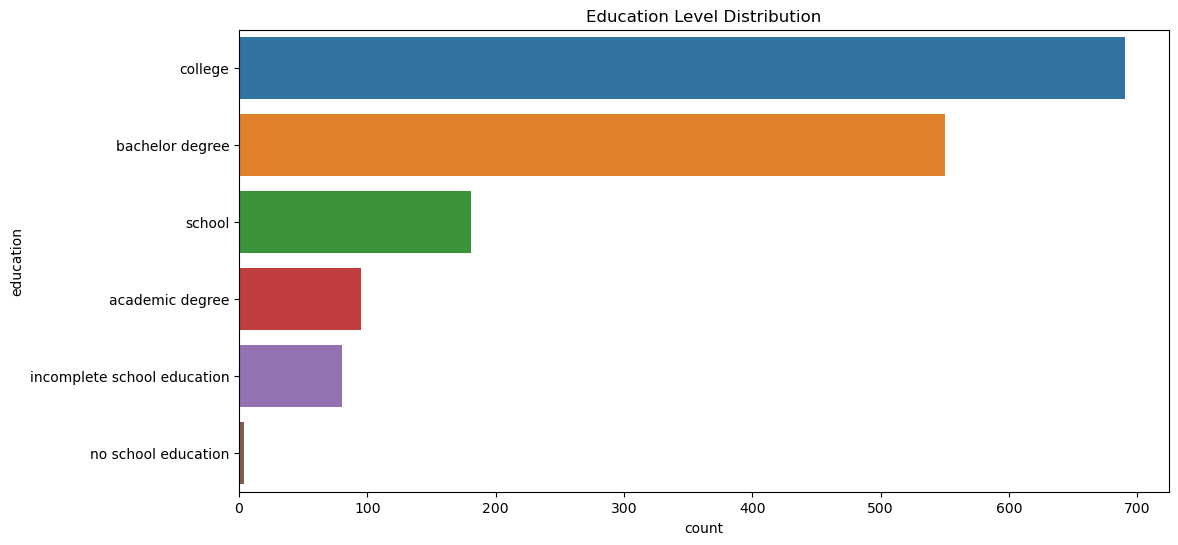

In [28]:
#Education Level Distribution
plt.figure(figsize=(12, 6))
sns.countplot(y='education', data=df, order=df['education'].value_counts().index)
plt.title('Education Level Distribution')
plt.show()


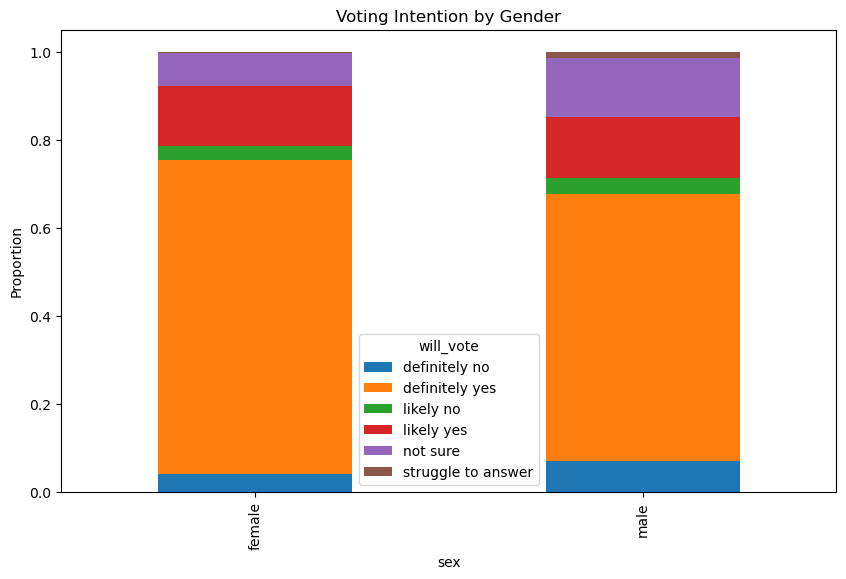

In [29]:
# Voting intention by gender
voting_by_gender = df.groupby('sex')['will_vote'].value_counts(normalize=True).unstack()
# Plot voting intention by gender
voting_by_gender.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Voting Intention by Gender')
plt.ylabel('Proportion')
plt.show()


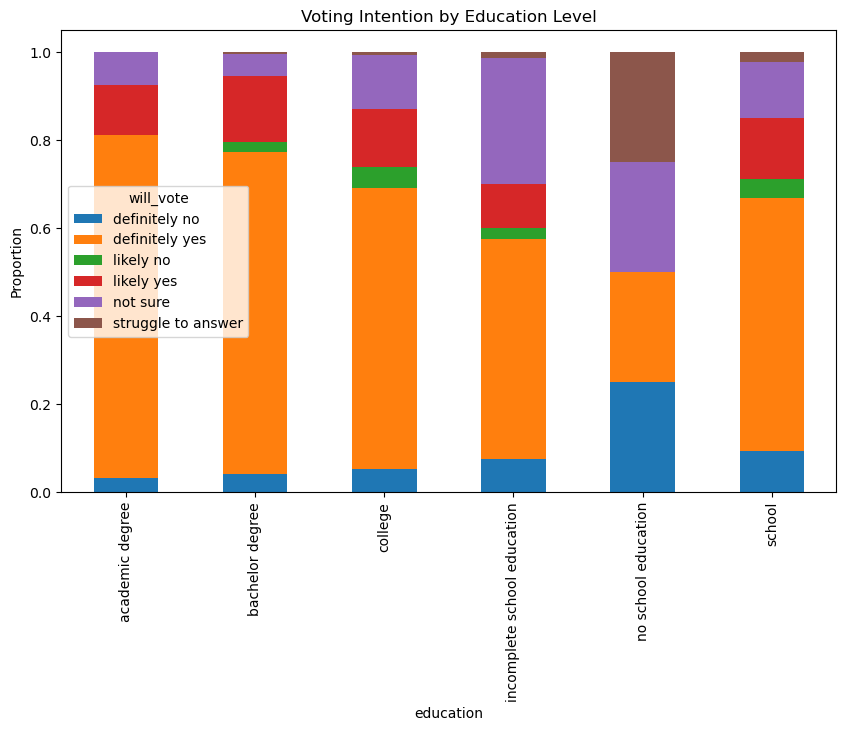

In [30]:
# voting bintention by education level 
voting_by_education = df.groupby('education')['will_vote'].value_counts(normalize = True).unstack()
# Plot voting intention by education level
voting_by_education.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Voting Intention by Education Level')
plt.ylabel('Proportion')
plt.show()

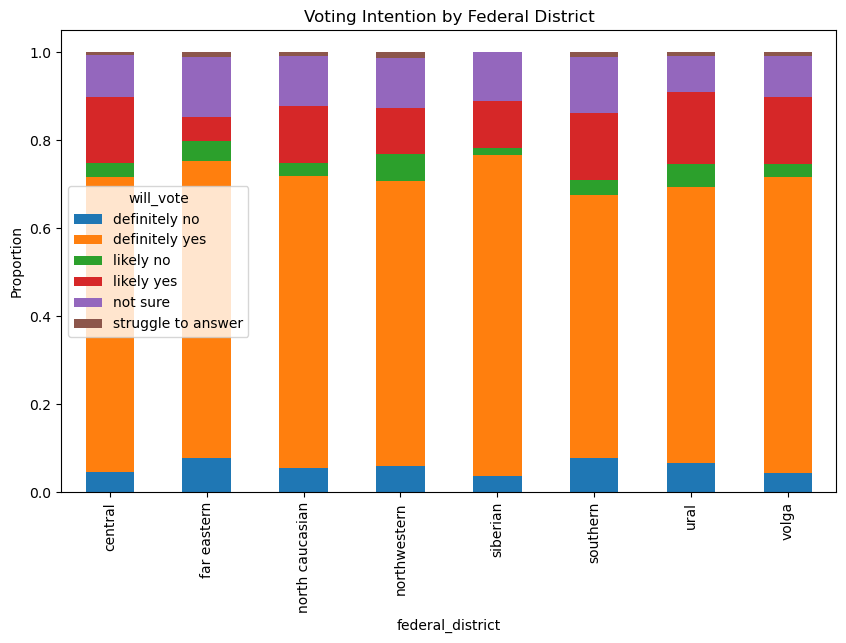

In [31]:
# Voting intention by federal district
voting_by_district = df.groupby('federal_district')['will_vote'].value_counts(normalize=True).unstack()

# Plot voting intention by federal district
voting_by_district.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Voting Intention by Federal District')
plt.ylabel('Proportion')
plt.show()



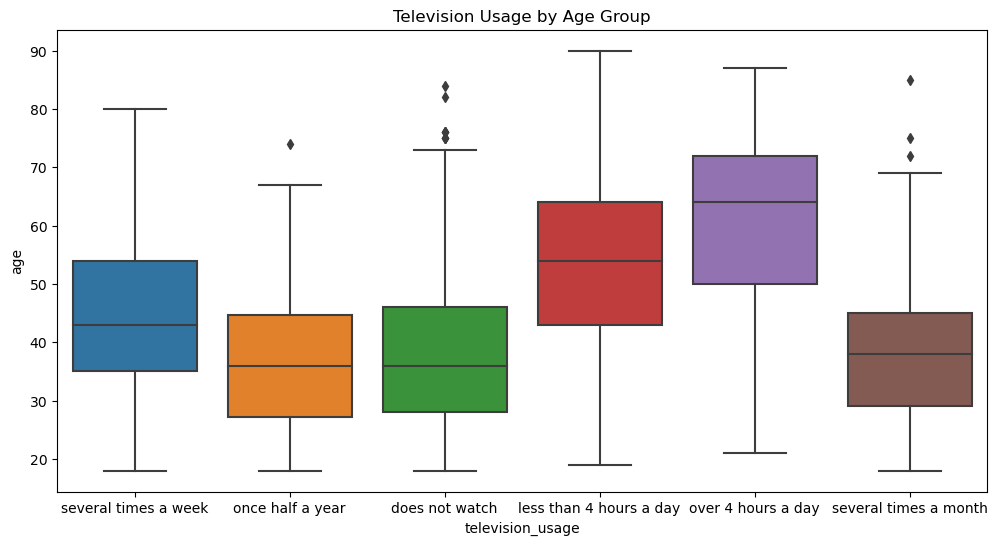

In [32]:
# Television usage by age group
plt.figure(figsize=(12, 6))
sns.boxplot(x='television_usage', y='age', data=df)
plt.title('Television Usage by Age Group')
plt.show()



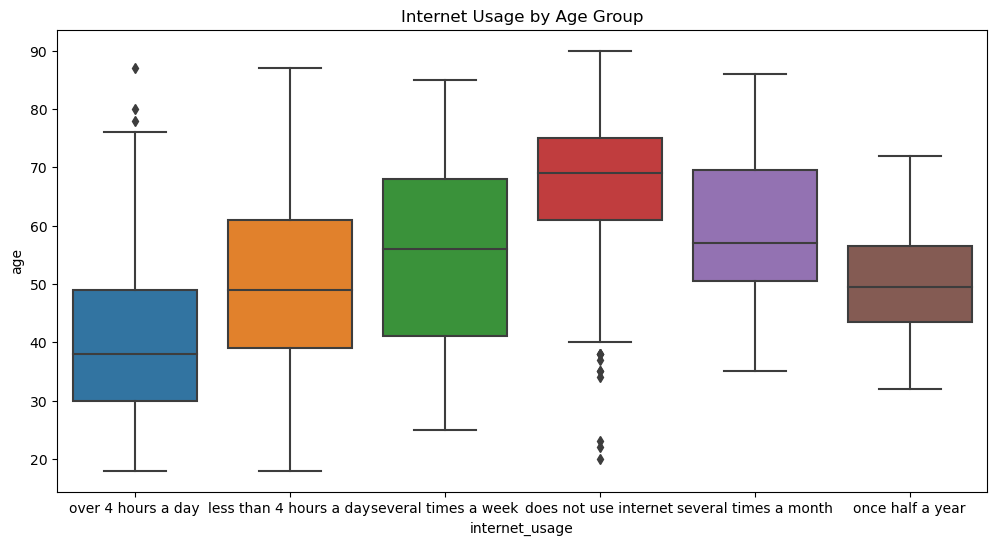

In [33]:
# Internet usage by age group
plt.figure(figsize=(12, 6))
sns.boxplot(x='internet_usage', y='age', data=df)
plt.title('Internet Usage by Age Group')
plt.show()

In [35]:
# predective analysis
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Prepare the data
features = df.drop(columns=['id', 'will_vote'])
features = pd.get_dummies(features)
target = df['will_vote']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 11  11   0   0   1   0]
 [  2 312   0   2   5   0]
 [  8   6   0   0   2   0]
 [  1  68   0   2   1   0]
 [  0  43   0   0   2   0]
 [  0   3   0   0   0   0]]
                    precision    recall  f1-score   support

     definitely no       0.50      0.48      0.49        23
    definitely yes       0.70      0.97      0.82       321
         likely no       0.00      0.00      0.00        16
        likely yes       0.50      0.03      0.05        72
          not sure       0.18      0.04      0.07        45
struggle to answer       0.00      0.00      0.00         3

          accuracy                           0.68       480
         macro avg       0.31      0.25      0.24       480
      weighted avg       0.59      0.68      0.58       480



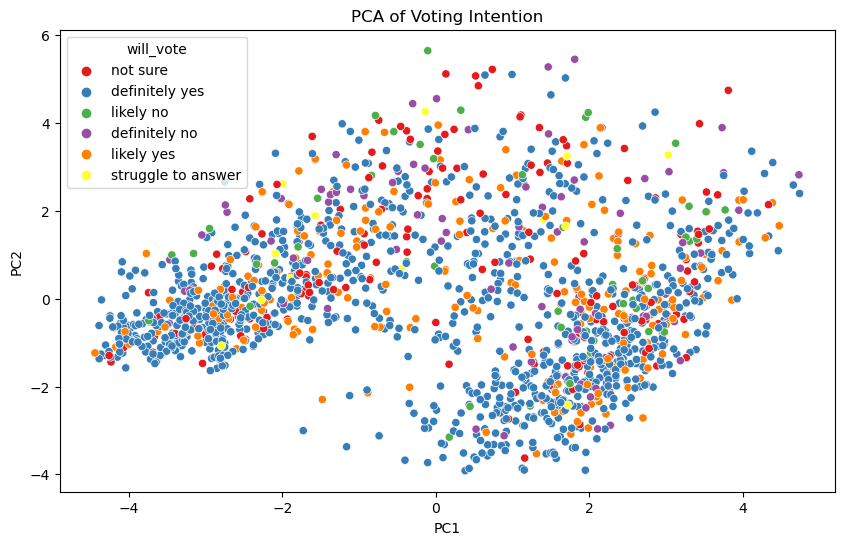

In [36]:
# principal Component Analysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(features)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['will_vote'] = target.values

# Plot the PCA result
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='will_vote', data=pca_df, palette='Set1')
plt.title('PCA of Voting Intention')
plt.show()
